In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial.distance import cdist
np.random.seed(8)

means=[[2,2],[8,3],[3,6]]
cov=[[1,0],[0,1]]
N=500
X0=np.random.multivariate_normal(means[0],cov,N)
X1=np.random.multivariate_normal(means[1],cov,N)
X2=np.random.multivariate_normal(means[2],cov,N)

X=np.concatenate((X0,X1,X2),axis=0)
K=3
original_label=np.asarray([0]*N+[1]*N+[2]*N).T

def kmeans_init_centroids(X,k):
    return X[np.random.choice(X.shape[0],k,replace=False)]

def kmeans_asign_label(X,centroids):
    D=cdist(X,centroids)
    return np.argmin(D,axis=1)

def has_converged(centroids,new_centroids):
    return (set([tuple(a) for a in centroids])==set([tuple(a) for a in new_centroids]))

def kmeans_update_centroids(X,labels,K):
    centroids=np.zeros((K,X.shape[1]))
    for k in range(K):
        Xk=X[labels==k,:]
        centroids[k,:]=np.mean(Xk,axis=0)
    return centroids

def kmeans(X,K):
    centroids=[kmeans_init_centroids(X,K)]
    labels=[]
    it=0
    while True:
        labels.append(kmeans_asign_label(X,centroids[-1]))
        new_centroids=kmeans_update_centroids(X,labels[-1],K)
        if has_converged(centroids[-1],new_centroids):
            break
        centroids.append(new_centroids)
        it+=1
    return (centroids,labels,it)

In [3]:
(centroids,labels,it)=kmeans(X,K)
print("Centers found by our algorithm:\n",centroids[-1])



Centers found by our algorithm:
 [[8.02344787 3.061206  ]
 [2.01380571 2.02688416]
 [3.01440769 5.96971345]]


In [10]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label=model.predict(X)

Centers found by scikit-learn:
[[8.02344787 3.061206  ]
 [3.01440769 5.96971345]
 [2.01380571 2.02688416]]


In [16]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')
print("Shape of mnist data:",mnist.data.shape)

Shape of mnist data: (70000, 784)


In [17]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
K=10
N=10000
X=mnist.data[np.random.choice(mnist.data.shape[0],N)]
kmeans=KMeans(n_clusters=K).fit(X)
pred_label=kmeans.predict(X)

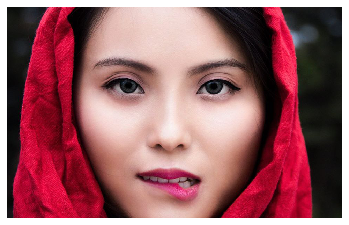

In [29]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
img=mpimg.imread('girl13.jpg')
imgplot=plt.imshow(img)
plt.axis('off')
plt.show()

In [30]:
X=img.reshape((img.shape[0]*img.shape[1],img.shape[2]))
print(X.shape)

(579840, 3)


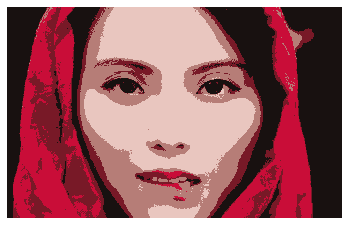

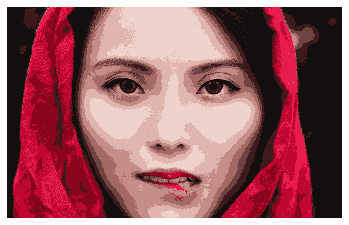

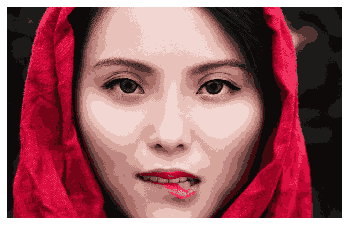

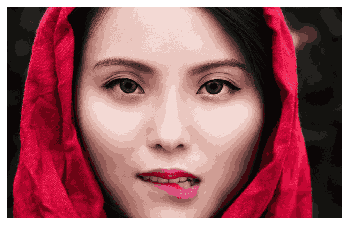

In [33]:
for K in [5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)
    img4 = np.zeros_like(X)
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()